# Deep Dive into Wordspace

In this section, we'll explore the concept of Wordspace in detail. Wordspace models are crucial for representing textual data as vectors within a geometric space.

## Theoretical Foundations of Wordspace

Wordspace is based on the idea that words with similar meanings are close to each other in a vector space. This concept, known as 'distributional semantics', posits that words appearing in similar contexts possess similar meanings.

### Key Components of Wordspace

1. **Vector Space Model**: In NLP, a vector space model is used to transform text into a vector of real numbers.
2. **Dimensionality**: The choice of dimensions in a Wordspace affects both the accuracy and computational efficiency of the model.
3. **Distance Metrics**: Various metrics can be used to measure the similarity or distance between two word vectors, such as Euclidean distance, Manhattan distance, and cosine similarity.

### Visualization of Wordspace

Visualizing high-dimensional word vectors can be challenging but insightful. Techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) are often used to reduce dimensions and visualize data.

## Practical Implementation of Wordspace

Let's implement a basic Wordspace using Python and visualize the results.

 


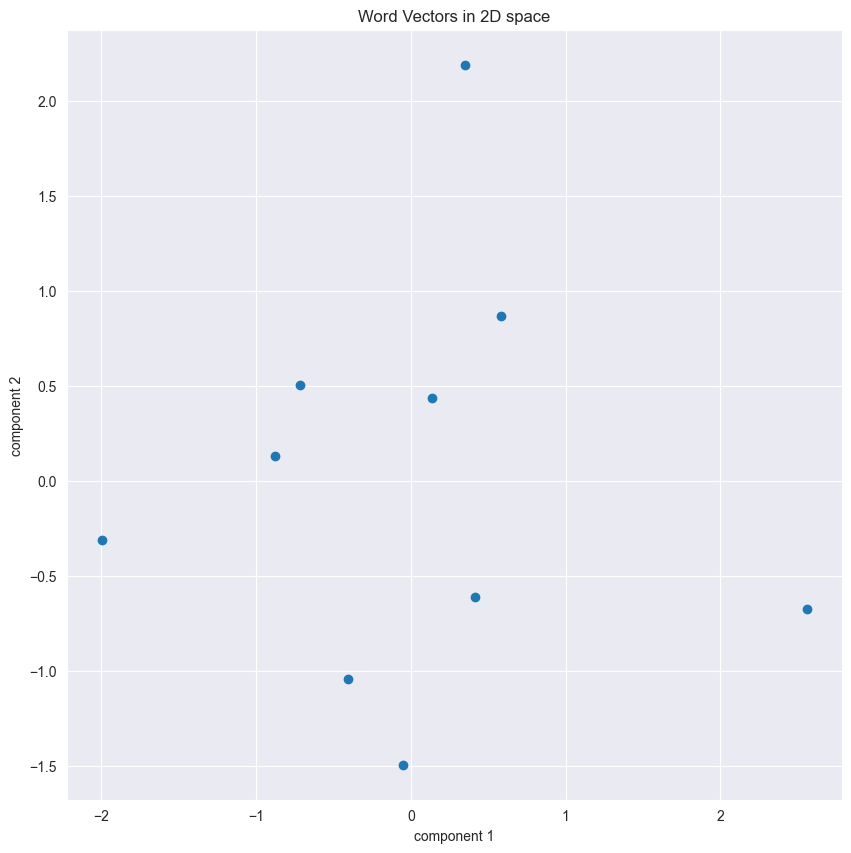

In [34]:
#Importing necessary libraries 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample word vectors(artificially generated for simplicity)
word_vectors = np.random.rand(10,100) # 10 words, 100-dimensional space

# Reduce dimensions to "D for visualization using PCA
pca = PCA(n_components=2)
word_vector_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10,10))
plt.scatter(word_vector_2d[: , 0],word_vector_2d[: , 1 ])
plt.title("Word Vectors in 2D space")
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.grid(True)
plt.show()




# Embeddings & Matrix Factorization

## Introduction to Embeddings

Embeddings are advanced representations where words are mapped to vectors of real numbers in a high-dimensional space. Unlike simpler Wordspace models, embeddings typically involve more complex algorithms and can capture deeper linguistic patterns.

### Types of Embedding Models

1. **Word2Vec**: Developed by Google, it uses neural networks to learn word associations from large corpora.
2. **GloVe (Global Vectors)**: Stanford's model that leverages matrix factorization on word co-occurrence matrices.
3. **FastText**: Incorporates subword information, making it robust to misspellings and variations of words.

## Matrix Factorization Techniques

Matrix factorization is a statistical method used to decompose a matrix into multiple constituent matrices, revealing hidden structures that can be helpful for understanding and reducing dimensions.

### Applying SVD to NLP

Singular Value Decomposition (SVD) is a powerful technique for dimensionality reduction and is particularly useful in NLP for decomposing term-document matrices.

## Hands-on: Creating a GloVe Model from Scratch

Let's simulate a small corpus to understand how GloVe models are constructed and applied.


In [39]:
import numpy as np

words = ['I','Love','NLP','and','Python']
co_occurrences = np.array([
    [0, 2, 1, 0, 0],
    [2, 0, 0, 1, 1],
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 1, 0],
])

# Apply SVD to decompose and reduce dimensions
U,S,V = np.linalg.svd(co_occurrences, full_matrices=False)

# Display the reduced dimensions for the world nlp
print(f"Reduced vector for 'nlp':{U[2, :100]}'") #






Reduced vector for 'nlp':[-1.91927615e-01  2.57713124e-01  4.17207703e-16  5.00000000e-01
 -8.04206277e-01]'


# Understanding and Implementing Word2Vec

In this section, we will dive into the Word2Vec model, which is a groundbreaking approach developed by researchers at Google for generating word embeddings. This model learns to embed words into a high-dimensional space by predicting their context in large corpora.

## What is Word2Vec?

Word2Vec is a predictive model for learning word embeddings from raw text. It comes in two flavors:
1. **CBOW (Continuous Bag of Words)**: Predicts a target word based on context words.
2. **Skip-gram**: Predicts surrounding context words from a target word.

These models help in capturing semantic and syntactic relationships between words.

## Practical Implementation of Word2Vec

Let's create a Word2Vec Skip-gram model using TensorFlow and Keras with a small dataset. We will walk through tokenization, generating training pairs, building and training the model, and visualizing the learned word embeddings.

Epoch 1/10
3/3 - 1s - 211ms/step - accuracy: 0.5521 - loss: 0.6929
Epoch 2/10
3/3 - 0s - 2ms/step - accuracy: 0.9559 - loss: 0.6885
Epoch 3/10
3/3 - 0s - 2ms/step - accuracy: 0.9853 - loss: 0.6877
Epoch 4/10
3/3 - 0s - 2ms/step - accuracy: 0.9853 - loss: 0.6847
Epoch 5/10
3/3 - 0s - 2ms/step - accuracy: 0.9896 - loss: 0.6821
Epoch 6/10
3/3 - 0s - 2ms/step - accuracy: 0.9853 - loss: 0.6797
Epoch 7/10
3/3 - 0s - 2ms/step - accuracy: 0.9853 - loss: 0.6774
Epoch 8/10
3/3 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.6752
Epoch 9/10
3/3 - 0s - 1ms/step - accuracy: 0.9896 - loss: 0.6729
Epoch 10/10
3/3 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.6696


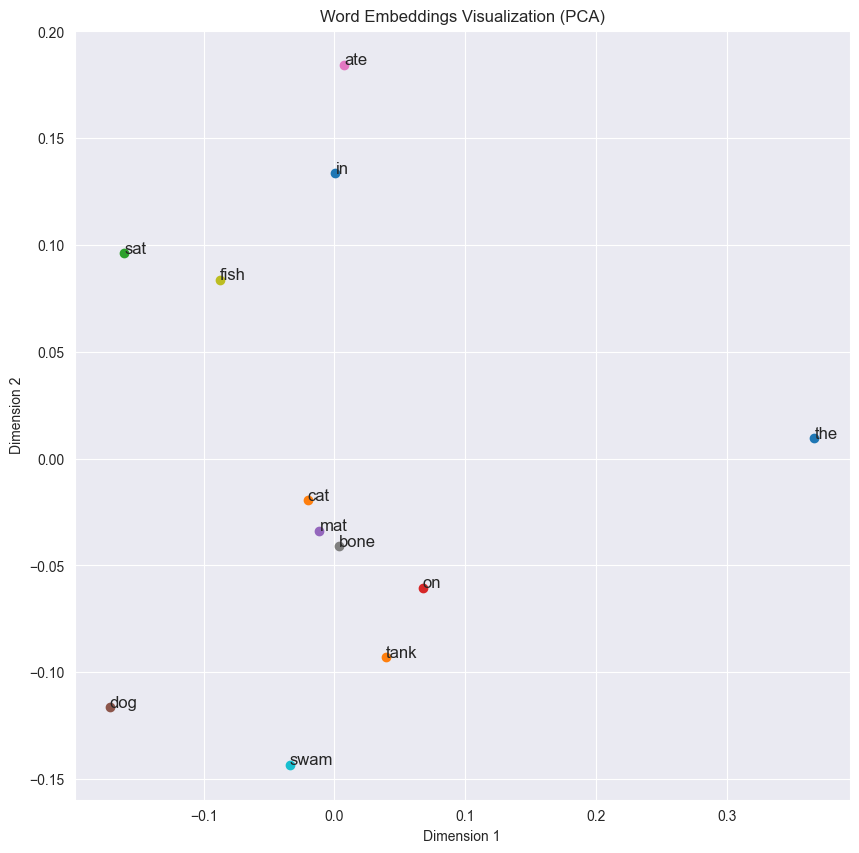

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Reshape, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Sample sentences for training
sentences = [
    "the cat sat on the mat",
    "the dog ate the bone",
    "the fish swam in the tank"
]

# Step 1: Tokenization
# Convert sentences into sequences of integers, where each integer represents a word.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for padding

# Convert sentences into sequences of integers
sequences = tokenizer.texts_to_sequences(sentences)

# Step 2: Generate Skip-gram Pairs
# Generate skip-gram pairs to train the model to predict context words from a given target word.
skip_grams = []
for sequence in sequences:
    # Generate pairs within a window size of 2
    pairs, _ = skipgrams(sequence, vocabulary_size=vocab_size, window_size=2)
    skip_grams.extend(pairs)

# Step 3: Data Preparation for Model Training
def generate_data(skip_grams, batch_size):
    """
    Generates batches of data for training the skip-gram model.

    Args:
        skip_grams (list of tuples): The skip-gram pairs generated from the input sentences.
        batch_size (int): The size of each batch.

    Yields:
        tuple: A tuple containing the inputs and labels for the model. The inputs are two arrays: one for the target words and one for the context words. The labels are an array indicating whether the context word is likely to appear in the context of the target word.
    """
    while True:
        np.random.shuffle(skip_grams)
        for i in range(0, len(skip_grams), batch_size):
            batch_pairs = skip_grams[i:i + batch_size]
            x_target = np.zeros((len(batch_pairs),), dtype=np.int32)
            x_context = np.zeros((len(batch_pairs), 1), dtype=np.int32)
            y = np.ones((len(batch_pairs), 1), dtype=np.float32)
            for j, (target, context) in enumerate(batch_pairs):
                x_target[j] = target
                x_context[j, 0] = context
            yield (x_target, x_context), y

# Step 4: Model Definition
embedding_dim = 50  # Dimension of the embedding vector
batch_size = 32     # Number of samples per gradient update

# Input layers for target and context words
input_target = Input((1,))
input_context = Input((1,))

# Embedding layer to learn word embeddings
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, name='embedding')

# Look up embeddings for target and context words
target = embedding(input_target)
target = Reshape((embedding_dim,))(target)
context = embedding(input_context)
context = Reshape((embedding_dim,))(context)

# Compute the dot product of the target and context embeddings
dot_product = Dot(axes=1)([target, context])

# Output layer with sigmoid activation to produce a probability
output = Dense(1, activation='sigmoid')(dot_product)

# Define the model
model = Model(inputs=[input_target, input_context], outputs=output)

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Step 5: Train the Model
# Create a TensorFlow dataset from the generator function
dataset = tf.data.Dataset.from_generator(
    lambda: generate_data(skip_grams, batch_size),
    output_signature=(
        (tf.TensorSpec(shape=(None,), dtype=tf.int32),
         tf.TensorSpec(shape=(None, 1), dtype=tf.int32)),
        tf.TensorSpec(shape=(None, 1), dtype=tf.float32),
    )
)

# Fit the model using the generated skip-gram pairs
model.fit(dataset, epochs=10, steps_per_epoch=len(skip_grams)//batch_size, verbose=2)

# Step 6: Extract and Visualize Word Embeddings
# Extract the learned word embeddings for further analysis
word_embeddings = model.get_layer('embedding').get_weights()[0]

# Reduce dimensionality of embeddings using PCA or t-SNE
def plot_embeddings(embeddings, word_index, method='PCA'):
    # Choose words to plot
    words = list(word_index.keys())
    word_ids = [word_index[word] for word in words]
    selected_embeddings = embeddings[word_ids]
    
    if method == 'PCA':
        pca = PCA(n_components=2)
        reduced_embeddings = pca.fit_transform(selected_embeddings)
    elif method == 't-SNE':
        tsne = TSNE(n_components=2)
        reduced_embeddings = tsne.fit_transform(selected_embeddings)
    
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        x, y = reduced_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), fontsize=12)
    plt.title(f'Word Embeddings Visualization ({method})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()

# Plot the embeddings
plot_embeddings(word_embeddings, word_index, method='PCA')
